## ЛАБОРАТОРНАЯ РАБОТА №3
## КЛАСТЕРИЗАЦИЯ ДАННЫХ

### 1. Получить у преподавателя набор данных для проведения анализа согласно цели выполняемой работы.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("4heart2.csv")

При помощи data.head и data.info выведем инфорамицию о датасете и его содержании, проанализируем, и в случае каких-либо ошибок исправим. 

In [2]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 2. Провести предварительную обработку данных (как в 1 ЛР).

Требуется привести названия столбцов к нижнему регистру и исправить тип данных в "age" на int

In [4]:
df.columns = df.columns.str.lower()
df[["age"]] = df[["age"]].astype(int)

Проверка данные на наличие пропусков

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Количество явных дубликатов в данных

In [6]:
df.duplicated().sum()

0

### 3. Кластеризация

In [7]:
from sklearn.preprocessing import StandardScaler

Создаем объект класса scaler. Обучаем стандартизатор и преобразуем набор данных

In [8]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

Импорт из модуля для иерархической кластеризации hierarhy, классы модели linkage и dendrogram

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Таблица связок между объектами

In [10]:
linked = linkage(df_sc, method="ward")

Построение дендрограммы

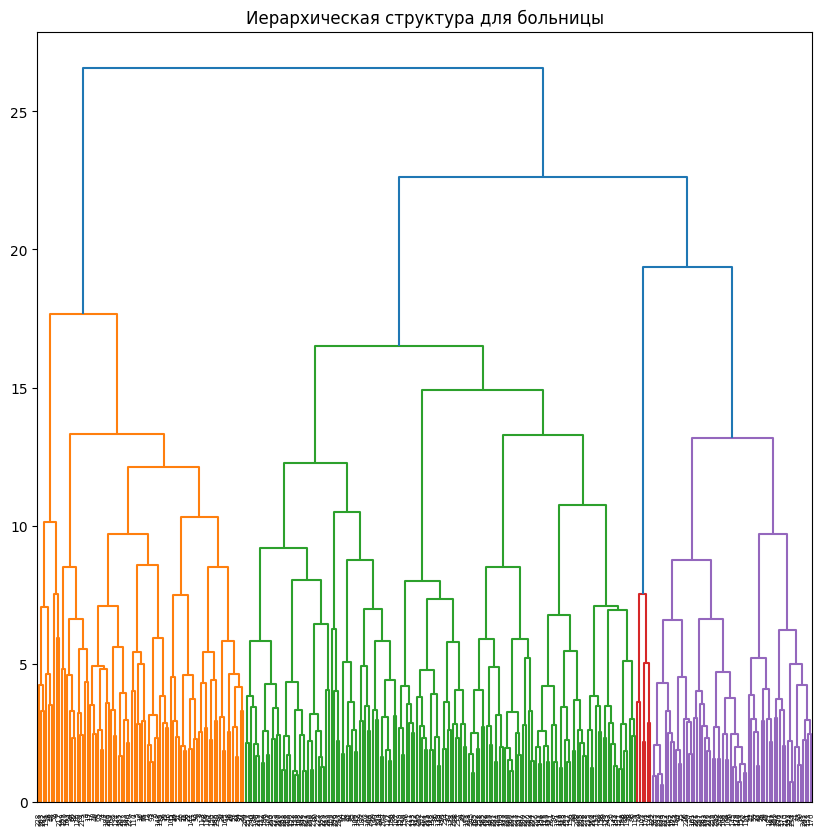

In [11]:
plt.figure(figsize=(10,10))
dendrogram(linked, orientation="top")
plt.title("Иерархическая структура для больницы")
plt.show()

Разделим данные на 4 кластера с применением метода KMeans и метрики высчитанной для агломеративной иерархической кластеризации

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(df_sc)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Среднее значение параметров по кластерам

In [29]:
df.groupby(labels).mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,57.500000,0.083333,4205.750000,0.500000,34.166667,0.083333,277893.005000,1.706667,139.166667,0.750000,0.333333,99.333333,0.666667
1,59.265060,0.469880,434.096386,0.518072,44.493976,0.409639,289411.423855,1.053855,137.710843,0.096386,0.012048,148.662651,0.060241
2,66.454545,0.545455,334.602273,0.420455,32.340909,0.465909,252990.320227,1.942159,134.318182,0.693182,0.329545,69.250000,0.920455
3,58.025862,0.353448,500.224138,0.336207,38.258621,0.250000,251077.916638,1.188879,137.336207,1.000000,0.534483,166.577586,0.017241


Метрика силуэта

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(df_sc, labels)

0.1072761322370461

График важности характеристик

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


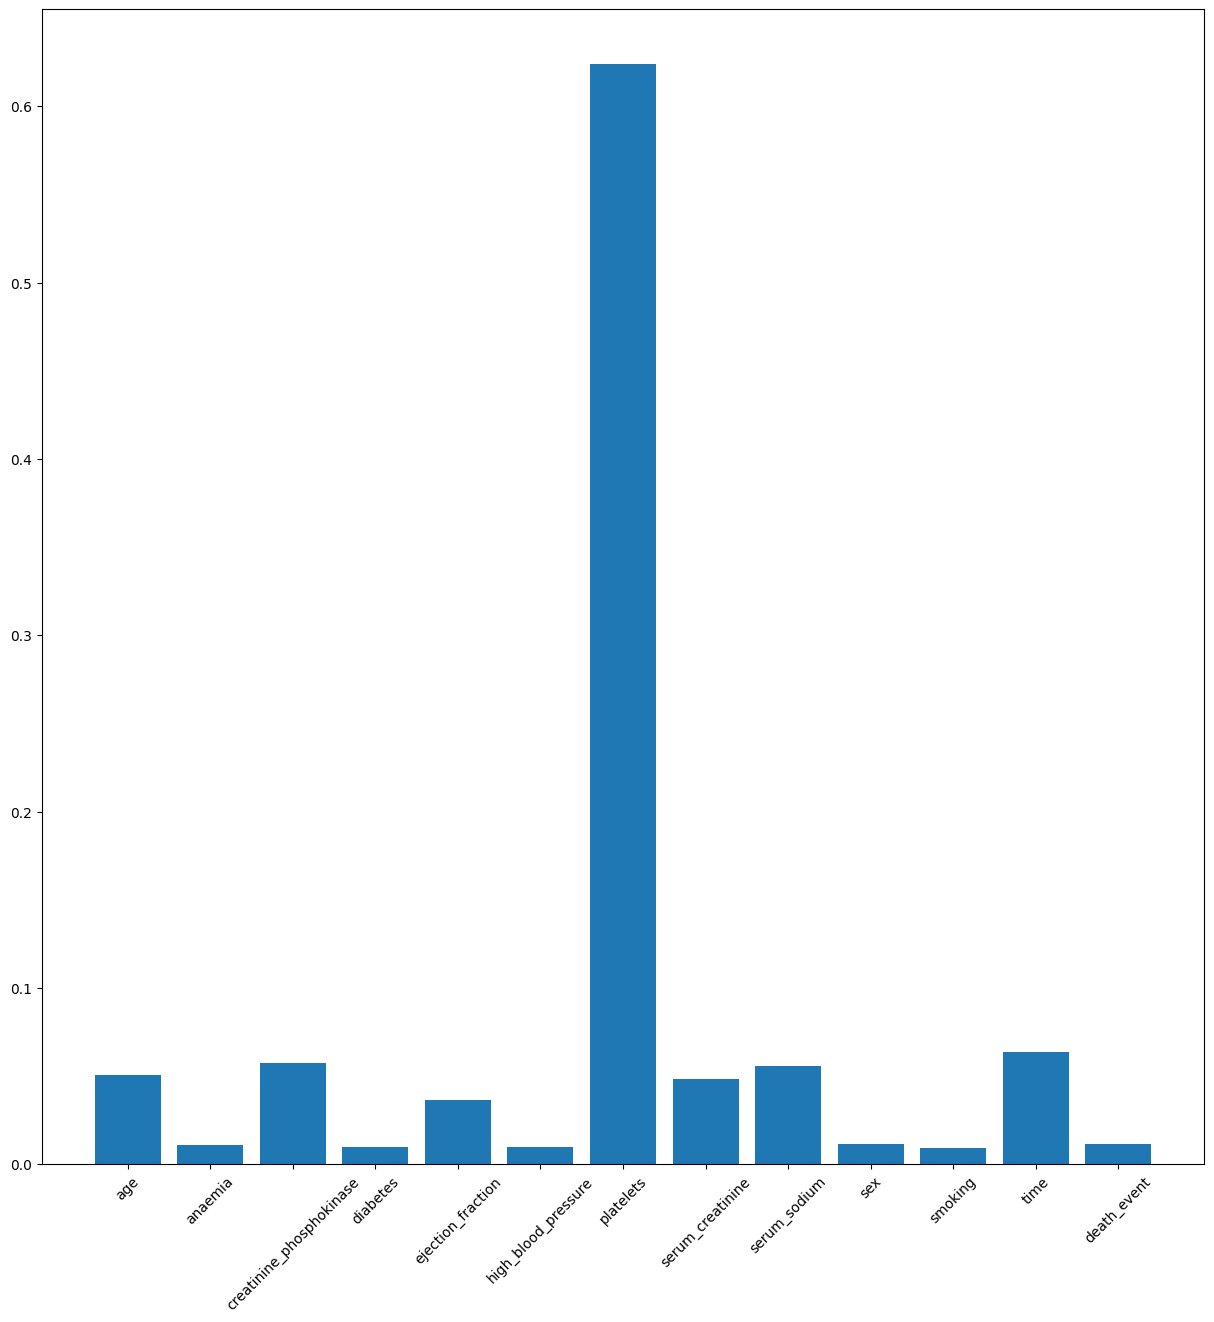

In [19]:
from sklearn.ensemble import RandomForestClassifier
km2 = KMeans(4)
km2.fit(df)

clf = RandomForestClassifier()
clf.fit(df, km2.labels_)

plt.figure(figsize=(15, 15))
plt.bar(df.columns, height=clf.feature_importances_)
plt.xticks(rotation=45)

plt.show()

### 4. Метод KMeans

In [32]:
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(df_sc)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Расчет евклидового расстояние между кластерами и отображение его на тепловой карте

<AxesSubplot: >

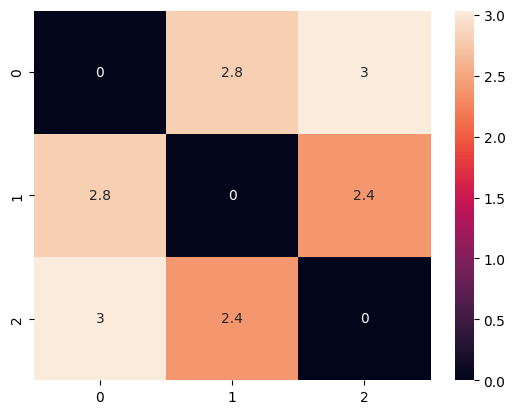

In [33]:
from sklearn.metrics.pairwise import euclidean_distances
from seaborn import heatmap

heatmap(euclidean_distances(km.cluster_centers_), annot=True)

In [35]:
from sklearn.cluster import KMeans
df.groupby(labels).mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,65.902174,0.510870,620.576087,0.423913,32.586957,0.445652,255150.698261,1.970761,134.576087,0.695652,0.315217,68.804348,0.934783
1,58.163934,0.344262,628.008197,0.336066,38.000000,0.245902,252533.101066,1.188443,137.327869,1.000000,0.540984,163.778689,0.024590
2,59.164706,0.470588,473.647059,0.529412,44.152941,0.400000,287778.213882,1.064353,137.835294,0.094118,0.011765,148.670588,0.082353


Метрика силуета

In [37]:
from sklearn.metrics import silhouette_score
silhouette_score(df_sc, labels_km)

0.1512086319964812

График важности характеристик

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


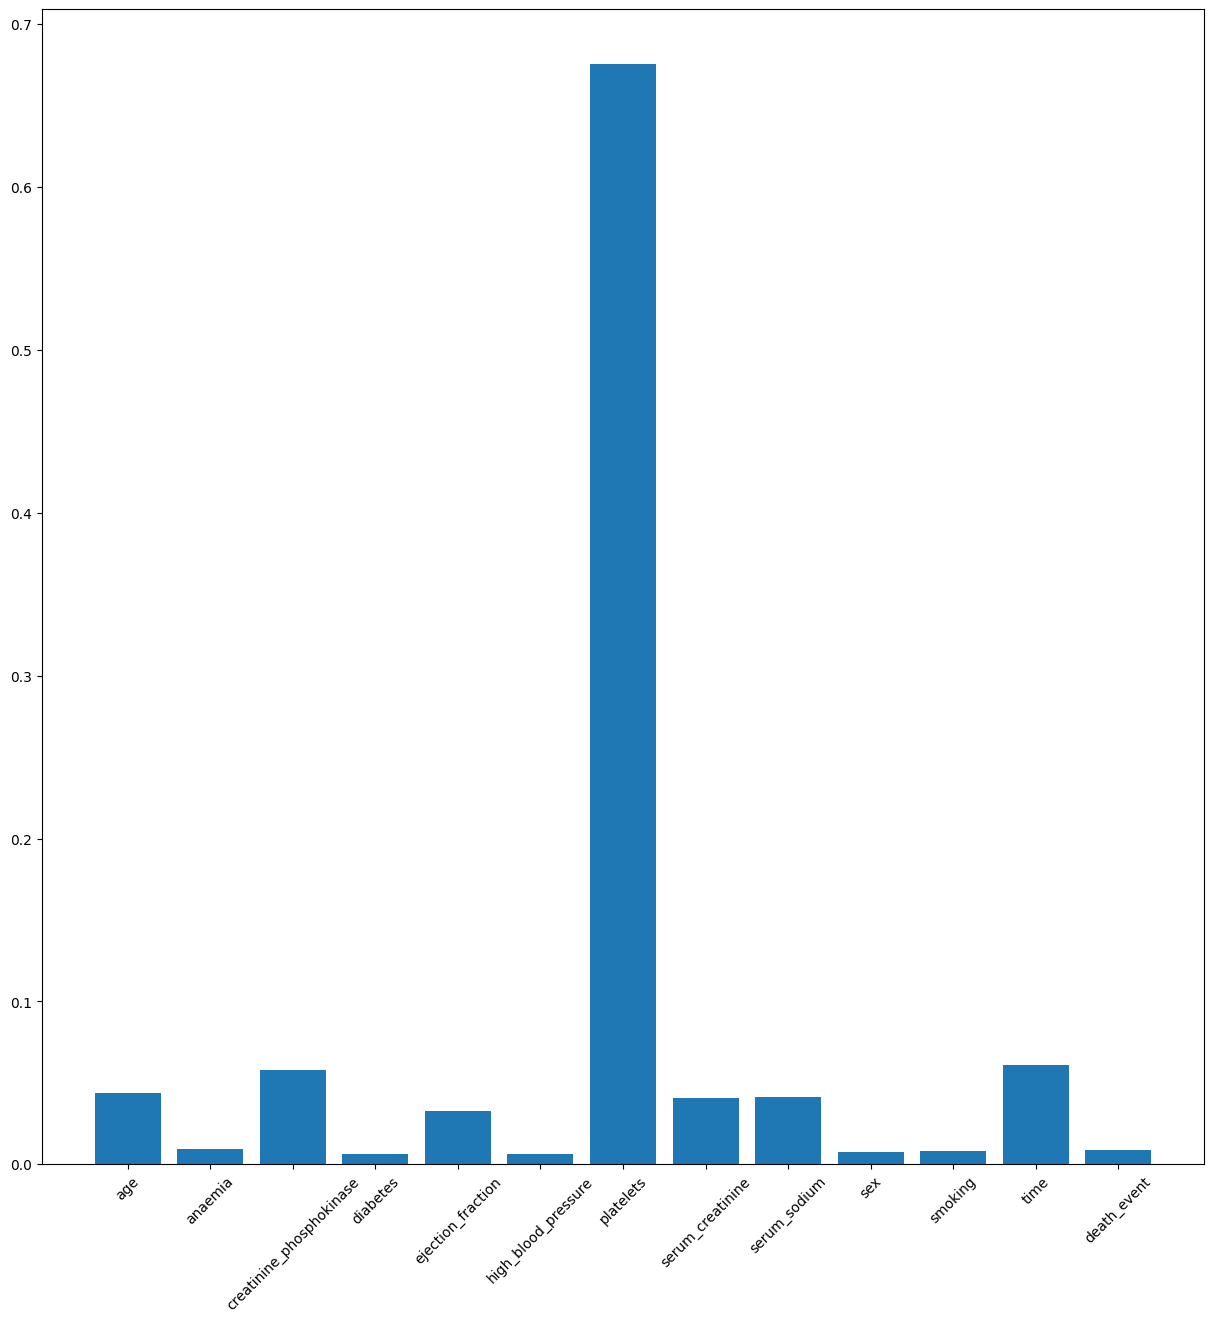

In [36]:
km2 = KMeans(3)
km2.fit(df)

clf = RandomForestClassifier()
clf.fit(df, km2.labels_)

plt.figure(figsize=(15, 15))
plt.bar(df.columns, height=clf.feature_importances_)
plt.xticks(rotation=45)

plt.show()

Определение оптимального числа кластеров, для этого воспользуемся критерием – суммы квадратов расстояний от точек до центроидов кластеров, к которым они относятся.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

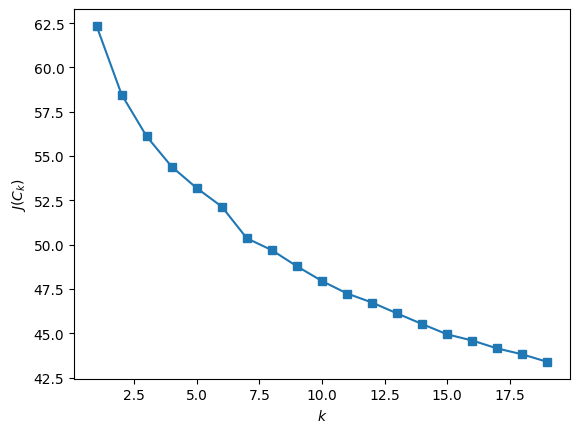

In [28]:
inertia = []
mx = 20
for k in range(1, mx):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_sc)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, mx), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

По правилу локтя подходят несколько значений. Это значения 5, 6 и 7. 

# Вывод

В ходе данной лабораторной работы были приобретены полезные изучению алгоритмов и методов кластерного анализа на практике. В процессе выполнения работы иерархический императивный метод показался наглядно удобнее, чам метод k-средних благодаря его визуализации в виде дерева склеивания кластеров. Таким образом визульно легко определить какой этап для остановки алгоритма будет наиболее оптимальным, чтобы вычислить оптимальное количество кластеров.